# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load the model module
from HighFreqIncProcess import HighFreqIncProcessClass
import fit

# Setup

In [2]:
model = HighFreqIncProcessClass(name='baseline',load=True)

**Load results:**

In [3]:
model.multistart_estimation(load=True,save=False)
model.apply_multistart()
model.est_results()

total time: 0min 17s (avg. cpu load: 100.0)
best obj. =   1.34992474
p_phi          estimated to be  0.1464 ( 0.0003)
p_psi          estimated to be  0.0085 ( 0.0000)
p_eta          estimated to be  0.0708 ( 0.0002)
p_xi           estimated to be  0.2060 ( 0.0004)
sigma_phi      estimated to be  0.0150 ( 0.0000)
sigma_psi      estimated to be  0.1982 ( 0.0018)
sigma_eta      estimated to be  0.6464 ( 0.0006)
sigma_xi       estimated to be  0.1222 ( 0.0002)
rho            estimated to be -0.0000 ( 0.0221)
mu_phi         estimated to be  0.0116 ( 0.0000)
mu_xi          estimated to be  0.0854 ( 0.0003)



**Prepare**

In [4]:
cdfmodels = fit.prepare_cdf([model],[1],sample='all')
model = cdfmodels[0]

# Plot

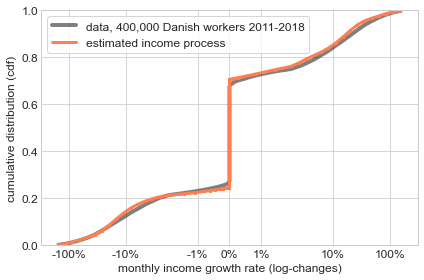

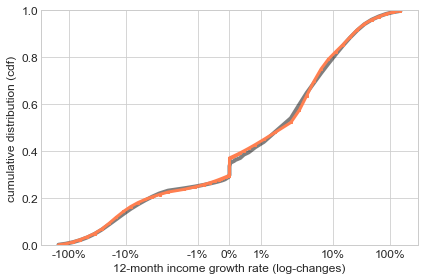

In [8]:
for momname in ['d1ky','d12ky']:
    
    fig = plt.figure(figsize=(6,6/1.5))
    ax = fig.add_subplot(1,1,1)

    # a. unpack
    x = model.par.omegas_cdf
    ydata = np.array([model.datamoms[(f'cdf_{momname}',(1,j))] for j in range(model.par.omegas_cdf.size)])

    # b. plot - data
    ax.plot(100*x,ydata,'-',lw=4,alpha=0.50,color='black',label='data, 400,000 Danish workers 2011-2018')

    # c. plot - model
    y = np.array([model.moms[(f'cdf_{momname}',(1,j))] for j in range(model.par.omegas_cdf.size)])
    ax.plot(100*x,y,lw=3,color='coral',marker='s',label='estimated income process',markersize=2)

    # d. details
    ax.set_xscale('symlog')
    if momname == 'd1ky': 
        ax.legend(frameon=True,fontsize=12)
        ax.set_xlabel(r'monthly income growth rate (log-changes)',fontsize=12)
    else:
        ax.set_xlabel(r'12-month income growth rate (log-changes)',fontsize=12)
        
    ax.set_xticks([-100,-10,-1,0,1,10,100])
    ax.set_xticklabels(['-100%','-10%','-1%','0%','1%','10%','100%'],fontsize=12)

    ax.set_ylim([0,1])
    ax.set_ylabel('cumulative distribution (cdf)',fontsize=12)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=12)

    fig.tight_layout()
    fig.savefig(f'figs/nicefigure_{momname}.png')
    fig.savefig(f'figs/nicefigure_{momname}.pdf')

    plt.show()